<a href="https://colab.research.google.com/github/wangjb/colab/blob/master/radar_scan_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get update
!sudo apt-get -qq install python-cartopy python3-cartopy
!sudo pip uninstall shapely -y
!sudo pip install shapely --no-binary shapely
!sudo apt-get install python3-grib

In [ ]:
!sudo apt-get update
!sudo apt-get install libproj-dev proj-data proj-bin
!sudo apt-get install libgeos-dev
!sudo pip install cython
!sudo pip install cartopy==0.18
!sudo pip uninstall shapely -y
!sudo pip install shapely --no-binary shapely
!sudo apt-get install python3-grib

In [ ]:
!pip install netCDF4 wradlib

In [ ]:
!wget https://github.com/wradlib/wradlib-data/archive/master.zip .

In [ ]:
!unzip master.zip

In [6]:
import os
os.environ['WRADLIB_DATA'] = '/content/wradlib-data-master'

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cp /content/drive/MyDrive/Colab\ Notebooks/10N120E_20101117_gmted_mea300.tif .

In [9]:
import wradlib as wrl
import matplotlib.pyplot as pl
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np


In [10]:
# RCWF 
sitecoords = (121.772778, 25.072778, 766.0)
nrays = 360 # number of rays
nbins = 400 # number of range bins
el = 0.5 # vertical antenna pointing angle (deg)
bw = 1.0 # half power beam width (deg)
range_res = 250. # range resolution (meters)

In [174]:
# RCHL
sitecoords = (121.620000, 23.990278, 61.0)
nrays = 360 # number of rays
nbins = 400 # number of range bins
el = 0.5 # vertical antenna pointing angle (deg)
bw = 1.0 # half power beam width (deg)
range_res = 250. # range resolution (meters)

In [189]:
# RCKT
sitecoords = (120.847222, 21.902500, 40.85)
nrays = 360 # number of rays
nbins = 400 # number of range bins
el = 0.5 # vertical antenna pointing angle (deg)
bw = 1.0 # half power beam width (deg)
range_res = 250. # range resolution (meters)

In [213]:
# RCCG
sitecoords = (120.088978, 23.147402, 33.0)
nrays = 360 # number of rays
nbins = 400 # number of range bminsm
el = 0.5 # vertical antenna pointing angle (deg)
bw = 1.0 # half power beam width (deg)
range_res = 250. # range resolution (meters)

In [78]:
# RCSL
sitecoords = (121.400546, 25.003839, 290.0)
nrays = 360 # number of rays
nbins = 400 # number of range bminsm
el = 0.5 # vertical antenna pointing angle (deg)
bw = 1.0 # half power beam width (deg)
range_res = 250. # range resolution (meters)

In [61]:
# RCNT
sitecoords = (120.579441, 24.144220, 293.0)
nrays = 360 # number of rays
nbins = 400 # number of range bminsm
el = 0.5 # vertical antenna pointing angle (deg)
bw = 1.0 # half power beam width (deg)
range_res = 250. # range resolution (meters)

In [30]:
# RCLY 
sitecoords = (120.380659, 22.526775, 153.0)
nrays = 360 # number of rays
nbins = 400 # number of range bminsm
el = 0.5 # vertical antenna pointing angle (deg)
bw = 1.0 # half power beam width (deg)
range_res = 250. # range resolution (meters)

In [18]:
r = np.arange(nbins) * range_res
beamradius = wrl.util.half_power_radius(r, bw)
print(r.shape, r[:5], r[-5:])
print(beamradius.shape, beamradius[:5], beamradius[-5:])

(400,) [   0.  250.  500.  750. 1000.] [98750. 99000. 99250. 99500. 99750.]
(400,) [0.         2.18166156 4.36332313 6.54498469 8.72664626] [861.75631817 863.93797974 866.1196413  868.30130287 870.48296443]


In [19]:
# (slant range, azimuth, elevation)
coord = wrl.georef.sweep_centroids(nrays, range_res, nbins, el)
print(coord.shape, coord[0][0], coord[-1][-1])

# transform to (lat, lon, alt) 
coords = wrl.georef.spherical_to_proj(coord[..., 0],
                                      coord[..., 1],
                                      coord[..., 2], sitecoords)
lon = coords[..., 0]
lat = coords[..., 1]
alt = coords[..., 2]
print(alt.shape, alt.min(), alt.max())

(720, 400, 3) [125.     0.25   0.5 ] [9.9875e+04 3.5975e+02 5.0000e-01]
(720, 400) 767.0917360000312 2224.212698634714


In [20]:
polcoords = coords[..., :2]
print("lon,lat,alt:", coords.shape)

lon,lat,alt: (720, 400, 3)


In [21]:
rlimits = (lon.min(), lat.min(), lon.max(), lat.max())
print("Radar bounding box:\n\t%.2f\n%.2f             %.2f\n\t%.2f" %
      (lat.max(), lon.min(), lon.max(), lat.min()))

Radar bounding box:
	25.97
120.78             122.76
	24.17


In [22]:
#rasterfile = wrl.util.get_wradlib_data_file('geo/bonn_gtopo.tif')
# rasterfile = wrl.util.get_wradlib_data_file('geo/bonn_new.tif')
rasterfile = '/content/10N120E_20101117_gmted_mea300.tif'

ds = wrl.io.open_raster(rasterfile)

# (nrows, ncols, 2)
# x, y coordinates
# rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds, nodata=-32768.)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
print(rastercoords.shape, rastercoords[0][0])

# Clip the region inside our bounding box
ind = wrl.util.find_bbox_indices(rastercoords, rlimits)
print(ind)
rastercoords = rastercoords[ind[1]:ind[3], ind[0]:ind[2], ...]
rastervalues = rastervalues[ind[1]:ind[3], ind[0]:ind[2]]
print(rastercoords.shape)

# Map rastervalues to polar grid points
polarvalues = wrl.ipol.cart_to_irregular_spline(rastercoords, rastervalues,
                                             polcoords, order=3,
                                             prefilter=False)
print(polarvalues.shape, polarvalues[0][0])

(2400, 3600, 2) [120.00402778  29.99569444]
(93, 482, 332, 699)
(217, 239, 2)
(720, 400) 504


In [25]:
PBB = wrl.qual.beam_block_frac(polarvalues, alt, beamradius)
PBB = np.ma.masked_invalid(PBB)
print(PBB.shape)

(720, 400)


In [27]:
CBB = wrl.qual.cum_beam_block_frac(PBB)
print(CBB.shape)

(720, 400)


In [28]:
# just a little helper function to style x and y axes of our maps
def annotate_map(ax, cm=None, title=""):
    ticks = (ax.get_xticks()/1000).astype(np.int)
    ax.set_xticklabels(ticks)
    ticks = (ax.get_yticks()/1000).astype(np.int)
    ax.set_yticklabels(ticks)
    ax.set_xlabel("Kilometers")
    ax.set_ylabel("Kilometers")
    if not cm is None:
        pl.colorbar(cm, ax=ax)
    if not title=="":
        ax.set_title(title)
    ax.grid()

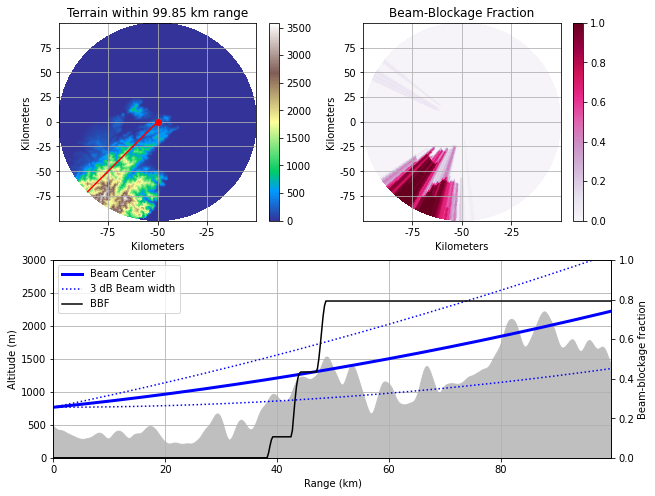

In [29]:
fig = pl.figure(figsize=(10, 8))

# create subplots
ax1 = pl.subplot2grid((2, 2), (0, 0))
ax2 = pl.subplot2grid((2, 2), (0, 1))
ax3 = pl.subplot2grid((2, 2), (1, 0), colspan=2, rowspan=1)

# azimuth angle
angle = 225

# convert to azi index
iangle = int(angle/ (360.0/nrays) )

# Plot terrain (on ax1)
ax1, dem = wrl.vis.plot_ppi(polarvalues,
                            ax=ax1, r=r,
                            az=coord[:,0,1],
                            cmap=mpl.cm.terrain, vmin=0.)
ax1.plot([0,np.sin(np.radians(angle))*1e5],
         [0,np.cos(np.radians(angle))*1e5],"r-")
ax1.plot(sitecoords[0], sitecoords[1], 'ro')
annotate_map(ax1, dem, 'Terrain within {0} km range'.format(np.max(r / 1000.) + 0.1))

# Plot CBB (on ax2)
ax2, cbb = wrl.vis.plot_ppi(CBB, ax=ax2, r=r,
                            az=coord[:,0,1],
                            cmap=mpl.cm.PuRd, vmin=0, vmax=1)
annotate_map(ax2, cbb, 'Beam-Blockage Fraction')

# Plot single ray terrain profile on ax3
bc, = ax3.plot(r / 1000., alt[iangle, :], '-b',
               linewidth=3, label='Beam Center')
b3db, = ax3.plot(r / 1000., (alt[iangle, :] + beamradius), ':b',
                 linewidth=1.5, label='3 dB Beam width')
ax3.plot(r / 1000., (alt[iangle, :] - beamradius), ':b')
ax3.fill_between(r / 1000., 0.,
                 polarvalues[iangle, :],
                 color='0.75')
ax3.set_xlim(0., np.max(r / 1000.) + 0.1)
ax3.set_ylim(0., 3000)
ax3.set_xlabel('Range (km)')
ax3.set_ylabel('Altitude (m)')
ax3.grid()

axb = ax3.twinx()
bbf, = axb.plot(r / 1000., CBB[iangle, :], '-k',
                label='BBF')
axb.set_ylabel('Beam-blockage fraction')
axb.set_ylim(0., 1.)
axb.set_xlim(0., np.max(r / 1000.) + 0.1)


legend = ax3.legend((bc, b3db, bbf),
                    ('Beam Center', '3 dB Beam width', 'BBF'),
                    loc='upper left', fontsize=10)

In [30]:
def height_formatter(x, pos):
    x = (x - 6370000) / 1000
    fmt_str = '{:g}'.format(x)
    return fmt_str

def range_formatter(x, pos):
    x = x / 1000.
    fmt_str = '{:g}'.format(x)
    return fmt_str

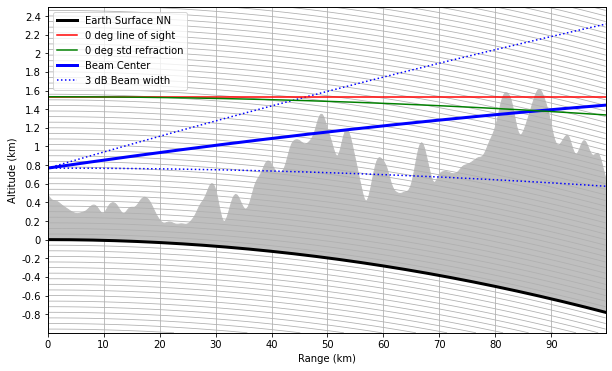

In [31]:
fig = pl.figure(figsize=(10, 6))

cgax, caax, paax = wrl.vis.create_cg(fig=fig, rot=0, scale=1)

# azimuth angle
angle = 225

# convert to azi index
iangle = int(angle/ (360.0/nrays) )

# fix grid_helper
er = 6370000
gh = cgax.get_grid_helper()
gh.grid_finder.grid_locator2._nbins=80
gh.grid_finder.grid_locator2._steps=[1,2,4,5,10]

# calculate beam_height and arc_distance for ke=1
# means line of sight
bhe = wrl.georef.bin_altitude(r, 0, sitecoords[2], re=er, ke=1.)
ade = wrl.georef.bin_distance(r, 0, sitecoords[2], re=er, ke=1.)
nn0 = np.zeros_like(r)
# for nice plotting we assume earth_radius = 6370000 m
ecp = nn0 + er
# theta (arc_distance sector angle)
thetap = - np.degrees(ade/er) + 90.0

# zero degree elevation with standard refraction
bh0 = wrl.georef.bin_altitude(r, 0, sitecoords[2], re=er)

# plot (ecp is earth surface normal null)
bes, = paax.plot(thetap, ecp, '-k', linewidth=3, label='Earth Surface NN')
bc, = paax.plot(thetap, ecp + alt[iangle, :], '-b', linewidth=3, label='Beam Center')
bc0r, = paax.plot(thetap, ecp + bh0 + alt[iangle, 0] , '-g', label='0 deg Refraction')
bc0n, = paax.plot(thetap, ecp + bhe + alt[iangle, 0], '-r', label='0 deg line of sight')
b3db, = paax.plot(thetap, ecp + alt[iangle, :]  + beamradius, ':b', label='+3 dB Beam width')
paax.plot(thetap, ecp + alt[iangle, :] - beamradius, ':b', label='-3 dB Beam width')

# orography
paax.fill_between(thetap, ecp,
                  ecp + polarvalues[iangle, :],
                  color='0.75')

# shape axes
cgax.set_xlim(0, np.max(ade))
cgax.set_ylim([ecp.min()-1000, ecp.max()+2500])
caax.grid(True, axis='x')
cgax.grid(True, axis='y')
cgax.axis['top'].toggle(all=False)
caax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(steps=[1,2,4,5,10], nbins=20, prune='both'))
caax.xaxis.set_major_locator(mpl.ticker.MaxNLocator())
caax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(height_formatter))
caax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(range_formatter))

caax.set_xlabel('Range (km)')
caax.set_ylabel('Altitude (km)')

legend = paax.legend((bes, bc0n, bc0r, bc, b3db),
                    ('Earth Surface NN', '0 deg line of sight', '0 deg std refraction', 'Beam Center', '3 dB Beam width'),
                    loc='upper left', fontsize=10)